In [1]:
import os


if 'tfg' not in os.listdir():
    os.chdir('..')

In [2]:
from tfg.strategies import Minimax, MonteCarloTree
from tfg.alphaZero import parallel_play
from tfg.alphaZeroAdapters import TicTacToeAdapter
from tfg.util import enable_gpu,play
from game.tictactoe import TicTacToe

In [3]:
enable_gpu()

game = TicTacToe()

## Performance during training

In [4]:
MCTS_ITER = 100
DIR = 'models/checkpoints/tictactoe'

az_games_played = list(range(0, 1000 + 1, 100))
az_training_draws = list()

minimax = Minimax(game)

# Before starting training
_, draws, _ = parallel_play(game, TicTacToeAdapter(), minimax,
                            color='black', max_workers=10,
                            mcts_iter=MCTS_ITER, games=100)
az_training_draws.append(draws)

for filename in os.listdir(DIR):
    _, draws, _ = parallel_play(game, TicTacToeAdapter(), minimax,
                                os.path.join(DIR, filename),
                                color='black', max_workers=10,
                                mcts_iter=MCTS_ITER, games=100)
    az_training_draws.append(draws)

az_training_draws

[22, 68, 100, 97, 92, 100, 100, 100, 92, 94, 100]

In [5]:
mcts = MonteCarloTree(game, max_iter=MCTS_ITER, reset_tree=False)
_, mcts_draws_, _ = play(game, minimax, mcts, games=100, max_workers=10)
mcts_draws_

53

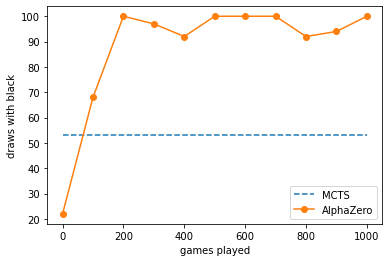

In [6]:
import matplotlib.pyplot as plt


plt.plot([az_games_played[0], az_games_played[-1]], [mcts_draws_, mcts_draws_], '--')
plt.plot(az_games_played, az_training_draws, '-o')
plt.legend(['MCTS', 'AlphaZero'])
plt.xlabel('games played')
plt.ylabel('draws with black')
plt.savefig('images/az_training.png')

## Performance after training

In [7]:
mcts_draws = list()
az_draws = list()
iters = (2, 20, 100, 200)

for m in iters:
    _, draws, _ = parallel_play(game, TicTacToeAdapter(), Minimax(game),
                                'models/TicTacToe.h5', 'black', max_workers=10,
                                mcts_iter=m, games=100)
    az_draws.append(draws)

for m in iters:
    mcts = MonteCarloTree(game, max_iter=m, reset_tree=False)
    _, draws, _ = play(game, minimax, mcts, games=100, max_workers=10)
    mcts_draws.append(draws)

mcts_draws, az_draws

([0, 17, 53, 68], [87, 92, 100, 100])

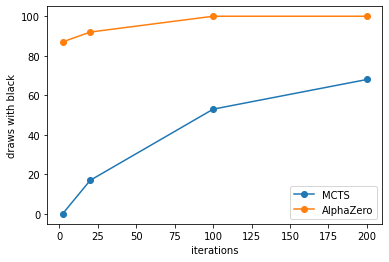

In [8]:
plt.plot(iters, mcts_draws, '-o')
plt.plot(iters, az_draws, '-o')
plt.legend(['MCTS', 'AlphaZero'])
plt.xlabel('iterations')
plt.ylabel('draws with black')
plt.savefig('images/az_vs_mcts.png')